In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
import graphufs
plt.style.use("graphufs.plotstyle")

In [3]:
ds1 = xr.open_dataset("oodf_lr1em3/results/loss.nc")
ds2 = xr.open_dataset("oodf_lr1em4/results/loss.nc")
ds3 = xr.open_dataset("oodd_lr1em4/results/loss.nc")

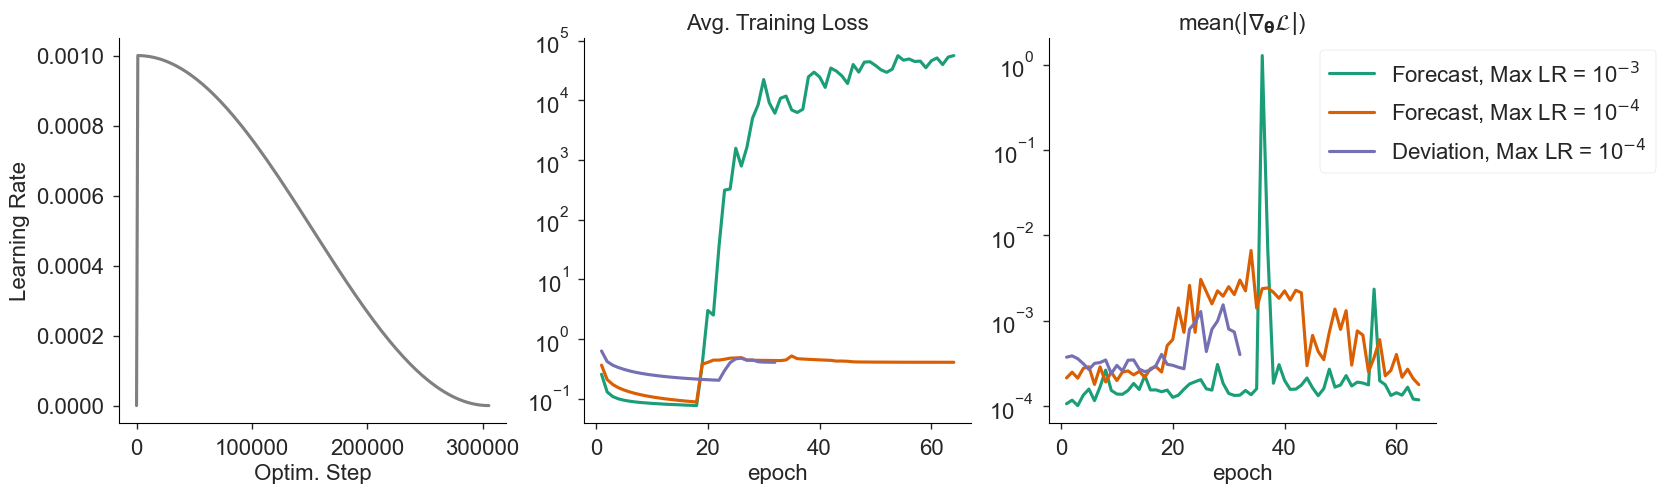

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(17,5))

ds1.learning_rate.plot(ax=axs[0], color="gray")
axs[0].set(ylabel="Learning Rate", xlabel="Optim. Step")
for key, long_name, ax in zip(
    ["loss_avg", "mgrad"],
    ["Avg. Training Loss", r"mean($|\nabla_\mathbf{\theta}\mathcal{L}|$)"],
    axs[1:],
):
    ds1[key].plot(ax=ax, yscale="log", label=r"Forecast, Max LR = 10$^{-3}$")
    ds2[key].plot(ax=ax, label=r"Forecast, Max LR = 10$^{-4}$")
    ds3[key].plot(ax=ax, label=r"Deviation, Max LR = 10$^{-4}$")
    ax.set(title=long_name,ylabel="")
ax.legend(loc=(.7, .65))
fig.savefig("figures/loss.png", dpi=300, bbox_inches="tight")

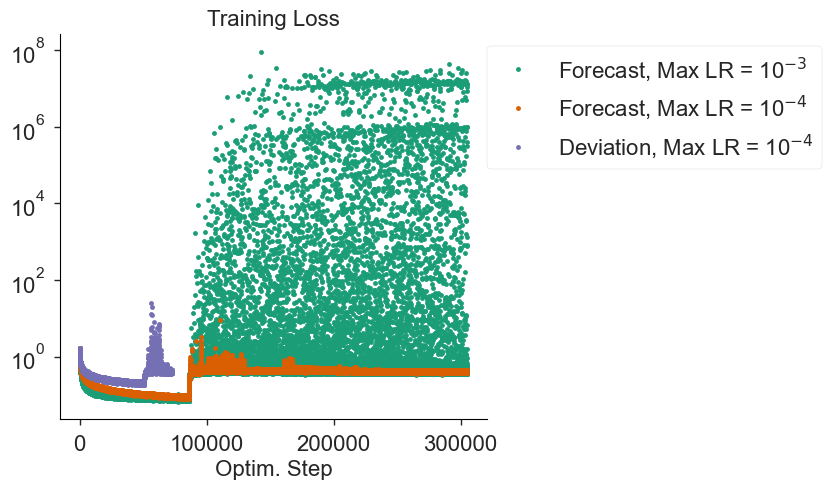

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(5.5,5))

for key, long_name in zip(
    ["loss"],
    ["Training Loss"],
):
    ds1[key].plot(ax=ax, yscale="log", label=r"Forecast, Max LR = 10$^{-3}$", linestyle="", marker=".")
    ds2[key].plot(ax=ax, label=r"Forecast, Max LR = 10$^{-4}$", linestyle="", marker=".")
    ds3[key].plot(ax=ax, label=r"Deviation, Max LR = 10$^{-4}$", linestyle="", marker=".")
    ax.set(title=long_name,ylabel="", xlabel="Optim. Step")
ax.legend(loc=(1., .65))
fig.savefig("figures/loss_per_optim_step.png", dpi=300, bbox_inches="tight")

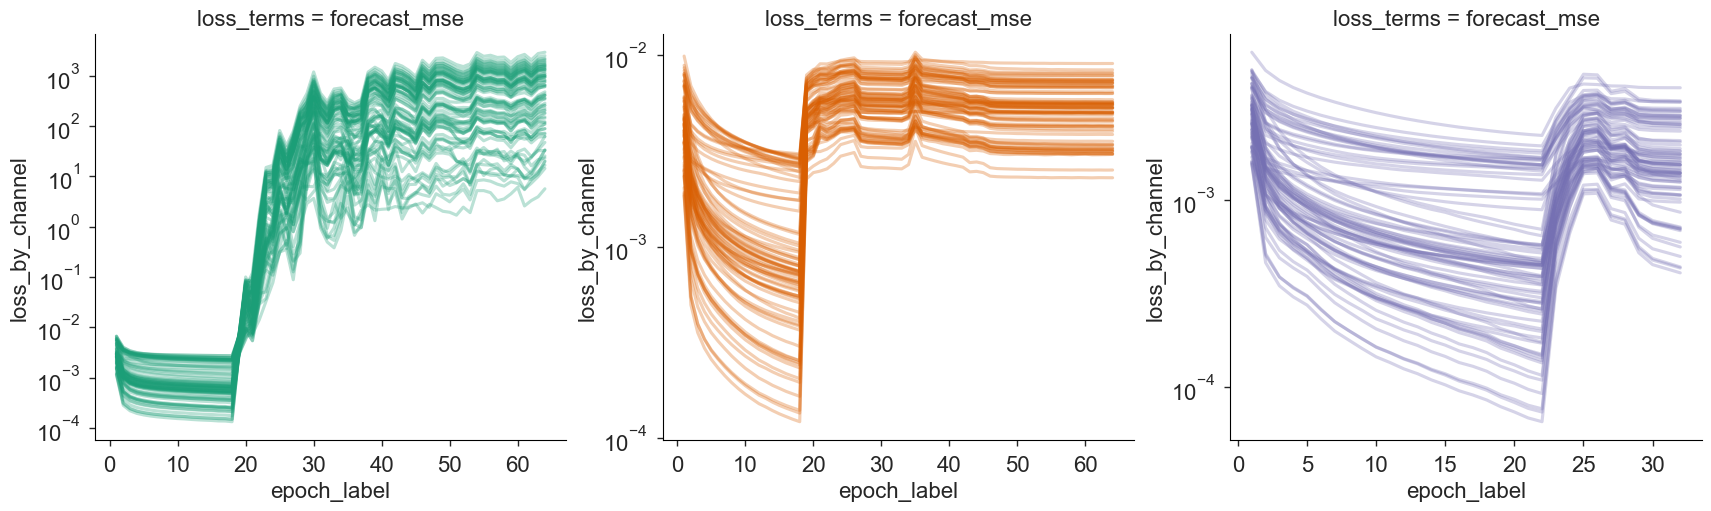

In [58]:
fig, axs = plt.subplots(1,3,figsize=(17,5), constrained_layout=True)
for i, (xds, ax) in enumerate(zip([ds1, ds2, ds3], axs)):
    lbc = xds.loss_by_channel.groupby(xds.epoch_label).mean().sel(loss_terms="forecast_mse")
    lbc.plot.line(ax=ax, x="epoch_label", alpha=.3, color=f"C{i}", add_legend=False, yscale="log");

fig.savefig(f"figures/loss_by_channel.png", dpi=300, bbox_inches="tight")

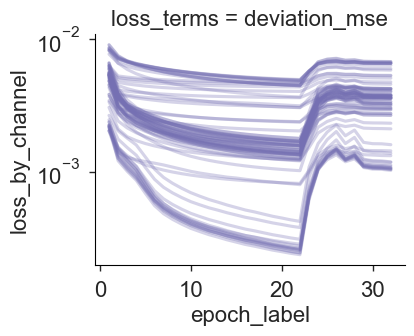

In [57]:
lbcd = ds3.loss_by_channel.groupby(xds.epoch_label).mean().sel(loss_terms="deviation_mse")
lbcd.plot.line(x="epoch_label", alpha=.3, color=f"C{i}", add_legend=False, yscale="log");